# Introduction to Machine Learning and Data Science: Exploratory Data Analysis (EDA) with Diabetes Dataset

This notebook contains exercises for an introductory course on Machine Learning and Data Science, focusing on Exploratory Data Analysis (EDA) using the Pima Indians Diabetes dataset.

We will cover essential steps in understanding, cleaning, transforming, and analyzing the data using pandas and matplotlib/seaborn. The exercises are divided into basic, intermediate, and advanced levels.

**Estimated Time:** 2 Hours

## Setup

First, we need to import the necessary libraries and load the dataset. The dataset does not come with headers, so we will define the column names based on common practice for this dataset:

1. Pregnancies
2. Glucose
3. BloodPressure
4. SkinThickness
5. Insulin
6. BMI
7. DiabetesPedigreeFunction
8. Age
9. Outcome (0 for no diabetes, 1 for diabetes)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# URL for the Pima Indians Diabetes dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

# Load the dataset
diabetes_df = pd.read_csv(url, names=names)

# Display the first few rows to confirm loading
print(diabetes_df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


## Basic Exercises (Approx. 45-60 minutes)

These exercises focus on fundamental data exploration and manipulation using pandas and basic visualization.

### Exercise 1: Initial Data Inspection

1. Display the last 7 rows of the `diabetes_df` DataFrame.
2. Get a concise summary of the DataFrame using `.info()`. How many entries are there? What are the data types?
3. Generate a statistical summary of the numerical attributes using `.describe()`. Pay attention to the minimum values for columns like `Glucose`, `BloodPressure`, `SkinThickness`, `Insulin`, and `BMI`. Do you notice anything unusual?
4. Examine the unique values and their counts for the `Outcome` column using `.value_counts()`. Is the dataset balanced in terms of the outcome variable?

In [3]:
# Your code for Exercise 1.1
diabetes_df.head(7)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1


In [4]:
# Your code for Exercise 1.2
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
# Your code for Exercise 1.3
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
# Your code for Exercise 1.4
columns_to_check = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in columns_to_check:
    count_zeros = (diabetes_df[col] == 0).sum()
    print(f"{col}: {count_zeros} righe con valore 0")

Pregnancies: 111 righe con valore 0
Glucose: 5 righe con valore 0
BloodPressure: 35 righe con valore 0
SkinThickness: 227 righe con valore 0
Insulin: 374 righe con valore 0
BMI: 11 righe con valore 0


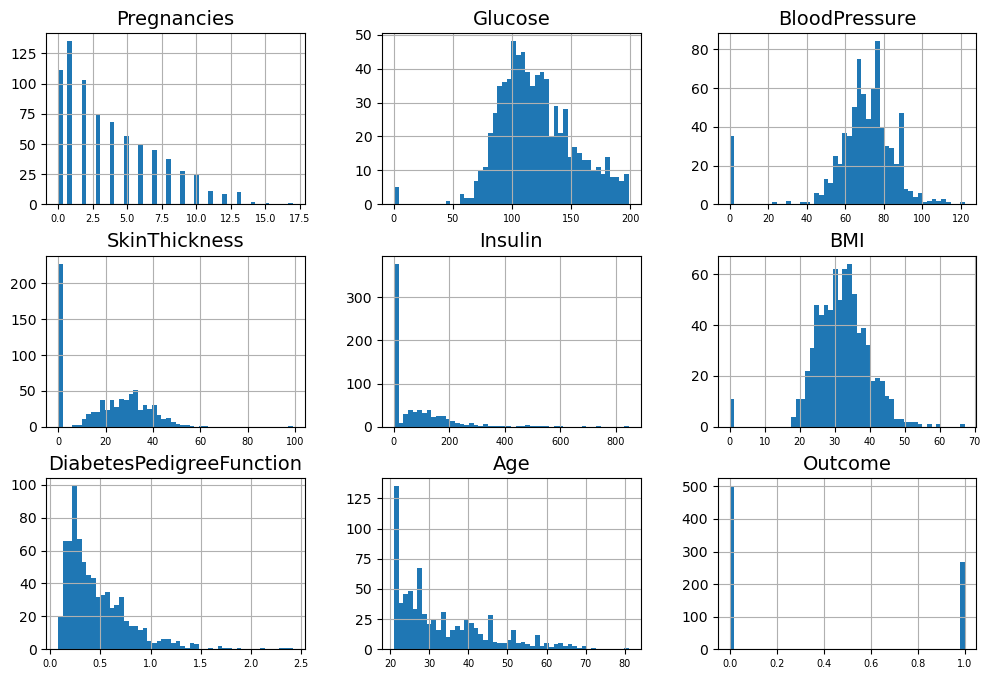

In [11]:
import matplotlib.pyplot as plt

# extra code – the next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=7)
plt.rc('ytick', labelsize=10)

diabetes_df.hist(bins=50, figsize=(12, 8))
plt.show()

In [12]:
columns_to_fix = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in columns_to_fix:
    mean_val = diabetes_df.loc[diabetes_df[col] != 0, col].mean()
    diabetes_df[col] = diabetes_df[col].replace(0, mean_val)

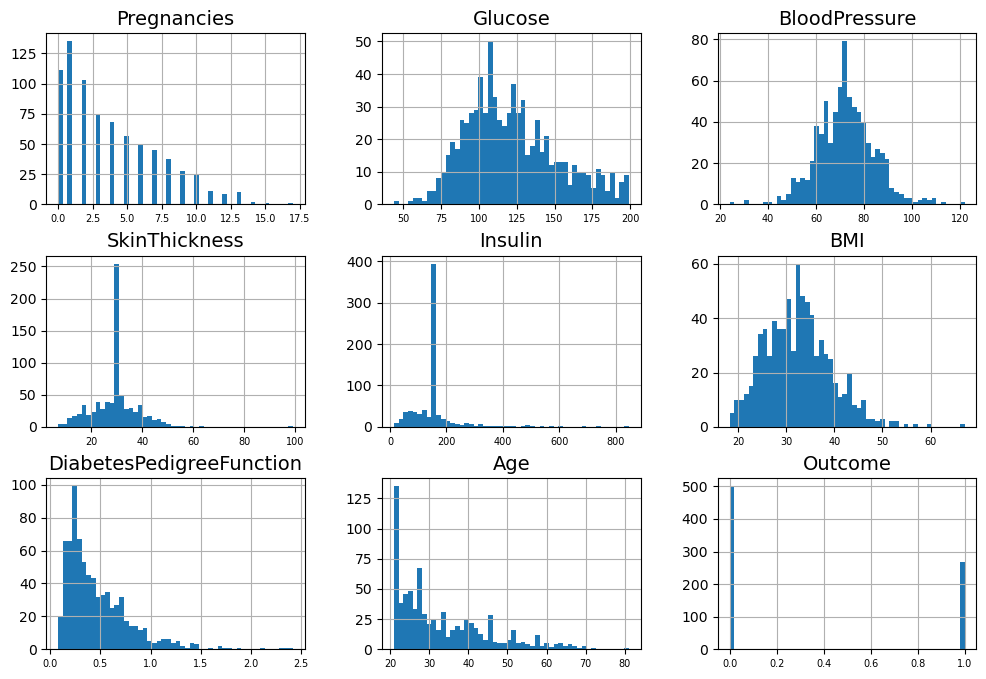

In [13]:
import matplotlib.pyplot as plt

# extra code – the next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=7)
plt.rc('ytick', labelsize=10)

diabetes_df.hist(bins=50, figsize=(12, 8))
plt.show()

### Exercise 2: Basic Data Filtering and Selection

1. Select and display only the `Age` and `BMI` columns for the first 10 patients.
2. Filter the DataFrame to show only the patients who tested positive for diabetes (`Outcome` is 1).
3. Calculate the average `Glucose` level for patients who tested negative for diabetes (`Outcome` is 0).

In [16]:
# Your code for Exercise 2.1
diabetes_df[['Age', 'BMI']].head(10)

,Age,BMI
0,50,33.600000
1,31,26.600000
2,32,23.300000
3,21,28.100000
4,33,43.100000
5,30,25.600000
6,26,31.000000
7,29,35.300000
8,53,30.500000
9,54,32.457464


In [18]:
# Your code for Exercise 2.2
diabetes_df[diabetes_df['Outcome'] == 1] # la parte interna crea una maschera (True/False)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1
6,3,78.0,50.0,32.00000,88.000000,31.0,0.248,26,1
8,2,197.0,70.0,45.00000,543.000000,30.5,0.158,53,1
...,...,...,...,...,...,...,...,...,...
755,1,128.0,88.0,39.00000,110.000000,36.5,1.057,37,1
757,0,123.0,72.0,29.15342,155.548223,36.3,0.258,52,1
759,6,190.0,92.0,29.15342,155.548223,35.5,0.278,66,1
761,9,170.0,74.0,31.00000,155.548223,44.0,0.403,43,1


In [20]:
# Your code for Exercise 2.3
Glucose_mean_val = diabetes_df.loc[diabetes_df['Outcome'] == 0, 'Glucose'].mean()
print(Glucose_mean_val )

110.71012057667103


### Exercise 3: Simple Visualization

1. Create a histogram for the `Age` column to visualize the age distribution of patients.
2. Generate a histogram for the `BMI` column.
3. Use seaborn's `countplot` to visualize the distribution of the `Outcome` variable (number of diabetic vs non-diabetic patients).

In [ ]:
# Your code for Exercise 3.1


In [ ]:
# Your code for Exercise 3.2


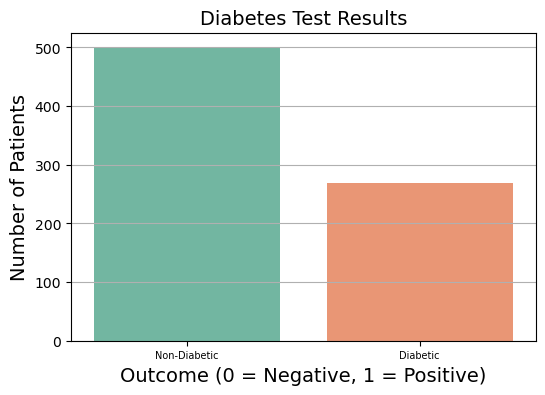

In [21]:
# Your code for Exercise 3.3
plt.figure(figsize=(6, 4))
sns.countplot(data=diabetes_df, x='Outcome', palette='Set2')
plt.title('Diabetes Test Results')
plt.xlabel('Outcome (0 = Negative, 1 = Positive)')
plt.ylabel('Number of Patients')
plt.xticks([0, 1], ['Non-Diabetic', 'Diabetic'])
plt.grid(axis='y')
plt.show()

## Intermediate Exercises (Approx. 45-60 minutes)

These exercises delve into data cleaning, manipulation, and basic feature engineering.

### Exercise 4: Handling Missing Data (Implicit Missing Values)

As observed in Exercise 1.3, some columns have a minimum value of 0, which might represent missing data (e.g., a blood pressure of 0 is biologically impossible).

1. For the `Glucose`, `BloodPressure`, `SkinThickness`, `Insulin`, and `BMI` columns, replace the 0 values with `NaN` (Not a Number) to explicitly mark them as missing.
2. Verify the number of missing values in these columns after the replacement using `.info()` or `.isnull().sum()`. Which column has the most missing values now?
3. Choose an imputation strategy for the missing numerical values (e.g., replace with the mean or median of the respective column). Justify your choice.
4. Apply the chosen imputation strategy to fill the `NaN` values in the affected columns. Verify that there are no more missing values in these columns.

In [ ]:
# Your code for Exercise 4.1


In [ ]:
# Your code for Exercise 4.2


In [ ]:
# Your code for Exercise 4.3 (Add comments for justification)


In [ ]:
# Your code for Exercise 4.4


### Exercise 5: Creating New Features (Feature Engineering)

Create a new categorical feature based on the `Age` column.

1. Define age bins (e.g., '0-20', '21-30', '31-40', '41-50', '51+').
2. Create a new column called `AgeGroup` by categorizing the `Age` values into these bins.
3. Display the value counts for the new `AgeGroup` column.

In [ ]:
# Your code for Exercise 5.1, 5.2, and 5.3


### Exercise 6: Exploring Correlations

1. Compute the correlation matrix for the numerical features in the DataFrame using `.corr()`.
2. Display the correlations of all numerical features with the `Outcome` variable, sorted in descending order. Which features have the strongest positive and negative correlations with diabetes outcome?
3. Use seaborn's `heatmap` to visualize the correlation matrix. Interpret the relationships between different features.

In [ ]:
# Your code for Exercise 6.1


In [ ]:
# Your code for Exercise 6.2


In [ ]:
# Your code for Exercise 6.3


## Advanced Exercises (Approx. 30-45 minutes, potentially carrying over into self-study)

These exercises challenge students with more complex data transformations and analysis.

### Exercise 7: Analyzing Relationships with Outcome

Use visualizations to explore the relationship between different features and the `Outcome` (diabetes positive or negative).

1. Create a violin plot using seaborn to visualize the distribution of `Age` for both `Outcome` groups (0 and 1).
2. Create a scatter plot of `Glucose` vs `BMI`, coloring the points based on the `Outcome` variable.
3. Use seaborn's `boxplot` to compare the distribution of `BloodPressure` across different `AgeGroup` categories (created in Exercise 5).

In [ ]:
# Your code for Exercise 7.1


In [ ]:
# Your code for Exercise 7.2


In [ ]:
# Your code for Exercise 7.3


### Exercise 8: Outlier Identification (Visualization Based)

Use box plots to visually identify potential outliers in some of the key numerical features.

1. Create box plots for `Glucose`, `BloodPressure`, `Insulin`, and `BMI`.
2. Discuss what outliers might represent in this medical dataset and how they could potentially affect machine learning models.

In [ ]:
# Your code for Exercise 8.1


### Exercise 9: (Optional Stretch) Further Feature Engineering or Analysis

Choose one of the following (or come up with your own idea):

1. Create a new feature that combines `BMI` and `Age` based on common health knowledge (e.g., BMI categories for different age groups).
2. Investigate the distribution of `DiabetesPedigreeFunction` and its relationship with the `Outcome`.

In [ ]:
# Your code or notes for Exercise 9
